In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import pulse2percept as p2p

In [2]:
# Load an Argus II array
argus = p2p.implants.ArgusII(x_center=-500, y_center=100, h=100, rot=45*np.pi/180)

03/13 16:27:47 [pulse2percept.implants:set_height] [WARNING] Distance to fovea=3211 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


In [3]:
# Start the simulation framework
sim = p2p.Simulation(argus)

In [4]:
# Set parameters of the optic fiber layer (OFL)
# In previous versions of the model, this used to be called the `Retina`
# object, which created a spatial grid and generated the axtron streak map.
sampling = 250       # spatial sampling of the retina (microns)
axon_lambda = 2        # constant that determines fall-off with axonal distance
sim.set_optic_fiber_layer(sampling=sampling, axon_lambda=axon_lambda,
                          x_range=[-3500, 2500], y_range=[-3000, 3000])

In [5]:
# Set parameters of the ganglion cell layer (GCL)
# In previous versions of the model, this used to be called `TemporalModel`.
t_gcl = 0.005 / 1000   # Sampling step (s) for the GCL computation
t_percept = 0.05       # Sampling step (s) for the perceptual output
sim.set_ganglion_cell_layer(tsample=t_gcl)

In [6]:
# Send a pulse train to two specific electrodes, set all others to zero
pt = p2p.stimuli.Psycho2Pulsetrain(t_gcl, freq=50, amp=20, dur=0.1)
stim = {'F7': pt, 'A8': pt}

In [7]:
# Send a pulse train to two specific electrodes, set all others to zero
pt = p2p.stimuli.Psycho2Pulsetrain(t_gcl, freq=50, amp=20, dur=0.1)
stim = {'F7': pt, 'A8': pt}

(<matplotlib.figure.Figure at 0x7feaa80d18d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fea910deb38>)

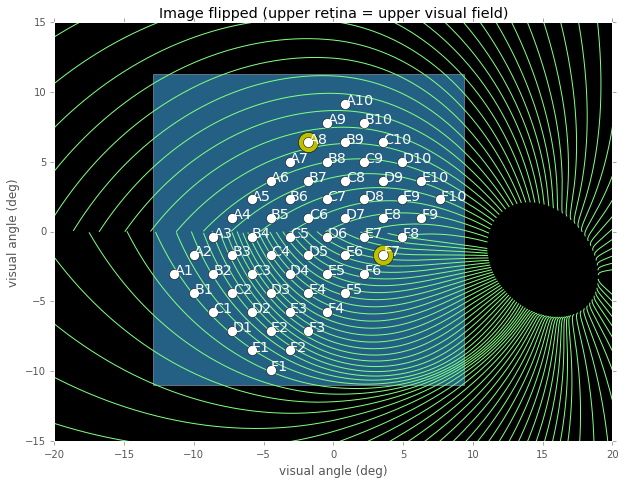

In [7]:
sim.plot_fundus(stim)

In [8]:
percept = sim.pulse2percept(stim, t_percept=t_percept, tol=0.25)

03/13 16:27:49 [pulse2percept.api:pulse2percept] [INFO] tol=25.0%, 547/625 px selected
03/13 16:27:49 [pulse2percept.api:pulse2percept] [INFO] Starting transform...
03/13 16:32:06 [pulse2percept.api:pulse2percept] [INFO] Done.


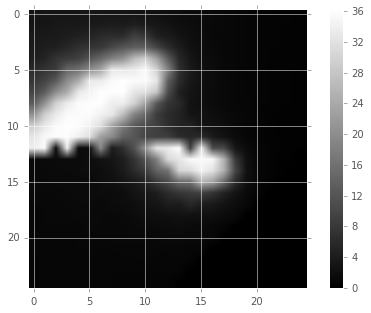

In [9]:
frame = p2p.get_brightest_frame(percept)
plt.figure(figsize=(8, 5))
plt.imshow(frame.data, cmap='gray')
plt.colorbar()